In [1]:
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [7]:
target=os.listdir('Data/')

In [8]:
print (target)

['model_50_0212', 'dtotfinal_0210.pkl']


In [9]:
dtot=pd.read_pickle('Data/dtotfinal_0210.pkl')

In [10]:
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [11]:
train_words=dtot['sent'].tolist()

In [26]:
model_tot_50_0212 = gensim.models.Word2Vec(train_words,size=50, min_count=5)

2017-02-13 00:58:44,838 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2017-02-13 00:58:44,844 : INFO : collecting all words and their counts
2017-02-13 00:58:44,848 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-13 00:58:44,900 : INFO : PROGRESS: at sentence #10000, processed 146629 words, keeping 14920 word types
2017-02-13 00:58:44,955 : INFO : PROGRESS: at sentence #20000, processed 295196 words, keeping 22021 word types
2017-02-13 00:58:45,018 : INFO : PROGRESS: at sentence #30000, processed 442097 words, keeping 27244 word types
2017-02-13 00:58:45,077 : INFO : PROGRESS: at sentence #40000, processed 592926 words, keeping 31677 word types
2017-02-13 00:58:45,132 : INFO : PROGRESS: at sentence #50000, processed 742744 words, keeping 35582 word types
2017-02-13 00:58:45,185 : INFO : PROGRESS: at sentence #60000, processed 892942 words, keeping 39103 word types
2017-02-13 00:58:45,241 : INFO : PROGRESS: at sente

In [13]:
model_tot_50_0212.save('Data/model_50_0212')

2017-02-13 00:42:40,060 : INFO : saving Word2Vec object under Data/model_50_0212, separately None
2017-02-13 00:42:40,061 : INFO : not storing attribute syn0norm
2017-02-13 00:42:40,063 : INFO : not storing attribute cum_table
2017-02-13 00:42:40,402 : INFO : saved Data/model_50_0212


In [30]:
dtot_shuffle = dtot.sample(frac=1).reset_index(drop=True)

In [31]:
dtrain=dtot_shuffle[:int(len(dtot)*0.6)]
dcv=dtot_shuffle[int(len(dtot)*0.6):int(len(dtot)*0.8)]
dtest=dtot_shuffle[int(len(dtot)*0.8):]

In [32]:
dtrain.head()

,label,length,sent,sentence
0,0,19,"[the, point, of, my, classes, is, to, think, c...",the point of my classes is to think critically...
1,1,6,"[and, preparatory, measure, has, been, developed]",and preparatory measure has been developed
2,0,14,"[so, we, just, have, this, random, sitting, ar...",so we just have this random sitting around unt...
3,0,10,"[or, are, you, a, salt, in, the, type, of, guy]",or are you a salt in the type of guy
4,0,6,"[hard, working, never, complains, gentle, and]",hard working never complains gentle and


In [35]:
dtest.describe()

,label,length
count,132037.000000,132037.000000
mean,0.451631,13.030976
std,0.497657,11.147756
min,0.000000,2.000000
25%,0.000000,7.000000
50%,0.000000,10.000000
75%,1.000000,16.000000
max,1.000000,1041.000000


In [36]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [37]:
def word_vec(x,dim,model):
    sentv = np.zeros(dim)
    for word in x:
        try:
            #x = model[word]
            #print (word)
            x = model[str(word)]
            sentv=sentv+x
        except:
            sentv=sentv
    #print (sentv)
    return sentv

In [38]:
dtrain_vec_100=dtrain['sent'].apply(lambda x: word_vec(x,50,model_tot_50_0212))
dtest_vec_100=dtest['sent'].apply(lambda x: word_vec(x,50,model_tot_50_0212))
dcv_vec_100=dcv['sent'].apply(lambda x: word_vec(x,50,model_tot_50_0212))

In [39]:
len(dtrain_vec_100)

396110

In [40]:
dtrain_vec_label_100=dtrain['label']
dtest_vec_label_100=dtest['label']
dcv_vec_label_100=dcv['label']

In [41]:
import time

In [42]:
start_time = time.time()

X=dtrain_vec_100.tolist()
Y=dtrain_vec_label_100.tolist()

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X,Y)

X_cv=dcv_vec_100.tolist()
Y_cv=dcv_vec_label_100.tolist()

print(clf.score(X_cv,Y_cv))

print ("My program took", time.time() - start_time, "to run")

0.791384233207
My program took 656.0602910518646 to run


In [43]:
X_test=dtest_vec_100.tolist()
Y_test=dtest_vec_label_100.tolist()


In [44]:
Y_predict=clf.predict(X_test)

In [46]:
clf.score(X_test, Y_test)

0.79167960495921597

In [47]:
words_words=model_tot_50_0212.vocab.keys()

2017-02-13 01:17:17,839 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab


In [49]:
def word_vec_ave(x,dim,model):
    sentv = np.zeros(dim)
    for word in x:
        try:
            #x = model[word]
            #print (word)
            x = model[str(word)]
            sentv=sentv+x
        except:
            sentv=sentv
    #print (sentv)
    return sentv/(len(x))

In [50]:
ave_vec=word_vec_ave(words_words,50,model_tot_50_0212)

In [85]:
dmand=pd.read_pickle('Data/lang8_mand.pkl')

In [51]:
print (ave_vec)

[  96.85992281  -99.75607778 -117.97352446  123.29439821   61.10215344
  -29.00167678  -98.61129616   89.16662693   28.13043478  -84.41756513
  159.11709379   82.02832075   28.56488078  -13.58201186  -59.90972852
   40.43198984  -57.33341647  -42.49150144  105.35375477   37.79322527
  -22.59015201   30.81222401  -26.2649948  -163.10244764  -52.26478841
   -7.60705265  -33.34683517  114.33590071   -3.12990453   35.06778198
   -2.79191525  -32.56854672  -64.53034544   36.2377602    31.78207053
  -10.93731898  136.80722362   18.59297184  -30.09312797 -182.6905897
  -10.25146598   -3.63532746  -63.69787782  -43.6860756    65.12638776
  -76.63962933   -9.1620932   108.94445041 -123.36353959  -45.54197531]


Everything but top implementation

In [52]:
def scale_vec(x,dim,model):
    sentv = np.zeros(dim)
    for word in x:
        try:
            #x = model[word]
            #print (word)
            x = model[str(word)]-ave_vec
            sentv=sentv+x
        except:
            sentv=sentv
    #print (sentv)
    return sentv

In [53]:
dtrain_vec_scale=dtrain['sent'].apply(lambda x: scale_vec(x,50,model_tot_50_0212))
dtest_vec_scale=dtest['sent'].apply(lambda x: scale_vec(x,50,model_tot_50_0212))
dcv_vec_scale=dcv['sent'].apply(lambda x: scale_vec(x,50,model_tot_50_0212))

In [54]:
dtrain_vec_label_100=dtrain['label']
dtest_vec_label_100=dtest['label']
dcv_vec_label_100=dcv['label']

In [55]:
start_time = time.time()

X=dtrain_vec_scale.tolist()
Y=dtrain_vec_label_100.tolist()

clf_scale = RandomForestClassifier(n_estimators=100)
clf_scale = clf_scale.fit(X,Y)

X_cv=dcv_vec_scale.tolist()
Y_cv=dcv_vec_label_100.tolist()

print(clf_scale.score(X_cv,Y_cv))

print ("My program took", time.time() - start_time, "to run")

NameError: name 'clfPscale' is not defined

In [56]:
print(clf_scale.score(X_cv,Y_cv))


0.797140195551


In [57]:
from sklearn.metrics import confusion_matrix

In [86]:
dmand_vec=dmand['sent'].apply(lambda x: scale_vec(x,50,model_tot_50_0212))


In [87]:
X_mand=dmand_vec.tolist()

In [88]:
Y_mand_pred=clf_scale.predict(X_mand)

In [65]:
confusion=confusion_matrix(Y_cv,Y_pred)

In [63]:
confusion=confusion/len(X_cv)

In [66]:
print(confusion)

[[61509 10861]
 [15924 43743]]


In [89]:
sum(Y_mand_pred)

10255

In [90]:
len(Y_mand_pred)

22159

In [91]:
10255/22159

0.46279164222212194

In [68]:
len(Y_cv)-sum(Y_cv)

72370

Accuracy (TP+TN)/(P+N) = 80%

Recall (TP/P)=73%

Specificity=85%

In [72]:
61509/(10861+61509)

0.8499240016581456

PPV(precision for english speaker)=85%

PPV(precision for korean speaker)=73%

In [75]:
import seaborn

In [74]:
confusion[1][1]/(confusion[1][0]+confusion[1][1])

0.73311880939212626

In [69]:
61509/72370

0.8499240016581456

In [84]:
confusion

array([[61509, 10861],
       [15924, 43743]])

IndexError: invalid index to scalar variable.

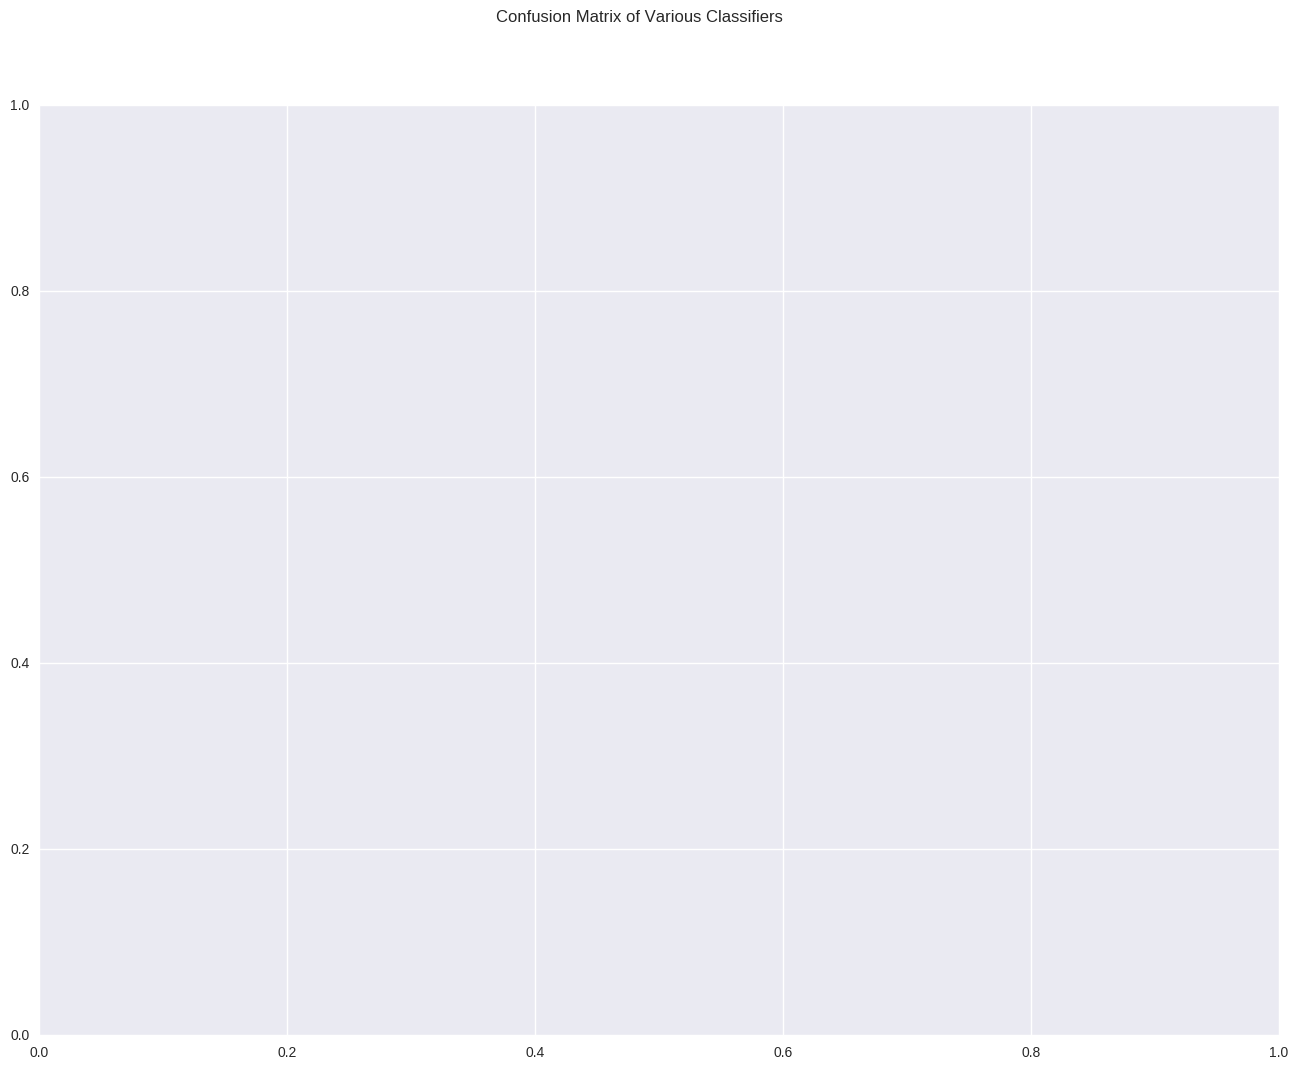

In [83]:
fix, ax = plt.subplots(figsize=(16, 12)) 
plt.suptitle('Confusion Matrix of Various Classifiers') 
matrix = values['matrix']    
title = values['title']    
plt.subplot(3, 3) # starts from 1    plt.title(title);    sns.heatmap(matrix, annot=True,  fmt='');